In [1]:
# Import image processing libraries
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def save_image(img, name):
    cv2.imwrite(name, img)

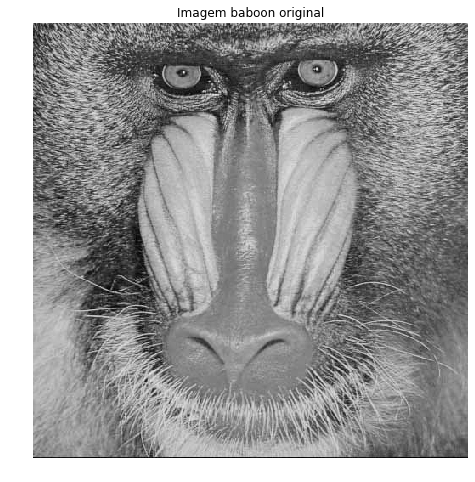

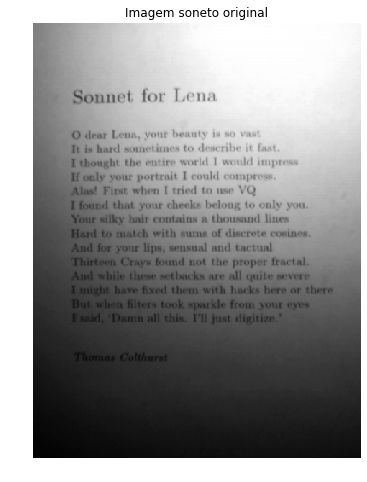

In [3]:
# Load some images (all the examples will use this image)
img = cv2.imread("baboon.pgm")
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = img.astype(float)

img2 = cv2.imread("sonnet.pgm")
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
img2 = img2.astype(float)

plt.rcParams["figure.figsize"] = (8,8)

plt.imshow(img, cmap=plt.cm.gray)
plt.title("Imagem baboon original"), plt.axis('off')
plt.show()

plt.imshow(img2, cmap=plt.cm.gray)
plt.title("Imagem soneto original"), plt.axis('off')
plt.show()

In [4]:
def apply_ordered_difusion(matrix, image):
    ''' Apply the ordered difusion given a matrix to distribute the pixels'''
    # Normalize the image with the matrix size
    new_image = (image / 255) * matrix.size 
    
    # Prepare the image to broadcast correclty (512x512xNxM)
    new_image = new_image.reshape((new_image.shape[0], new_image.shape[1], 1, 1))
    
    # Apply the matrix, inserting for each element a nxm matrix
    new_image = np.where(matrix <= new_image, 1, 0)
    # stack the NxM to be a 512xNx512xM image
    return np.hstack(np.hstack(new_image))


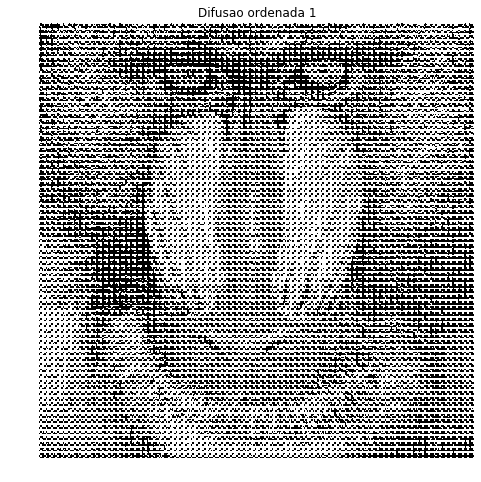

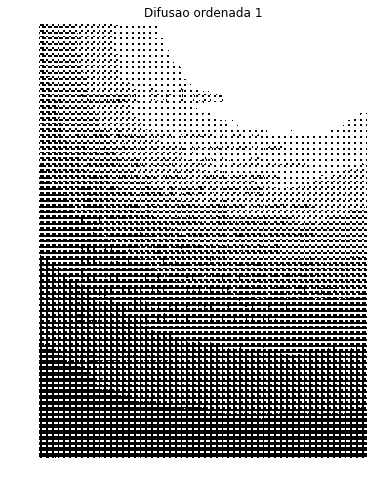

True

In [5]:
m1 = np.array([
    [6,8,4],
    [1,0,3],
    [5,2,7],
])

# Normalize image to [0-9]
image_1 = apply_ordered_difusion(m1, img)
plt.imshow(image_1, cmap=plt.cm.gray)
plt.title("Difusao ordenada 1"), plt.axis('off')
plt.show()

# Normalize image to [0-9]
image_1_soneto = apply_ordered_difusion(m1, img2)
plt.imshow(image_1_soneto, cmap=plt.cm.gray)
plt.title("Difusao ordenada 1"), plt.axis('off')
plt.show()

save_image(image_1, 'results/image_1.pbm')

save_image(image_1_soneto, 'results/image_1_soneto.pbm')

# Check if the image contains only 0 and 1
len(image_1[image_1 == 1]) + len(image_1[image_1 == 0]) == image_1.size and \
len(image_1_soneto[image_1_soneto == 1]) + len(image_1_soneto[image_1_soneto == 0]) == image_1_soneto.size

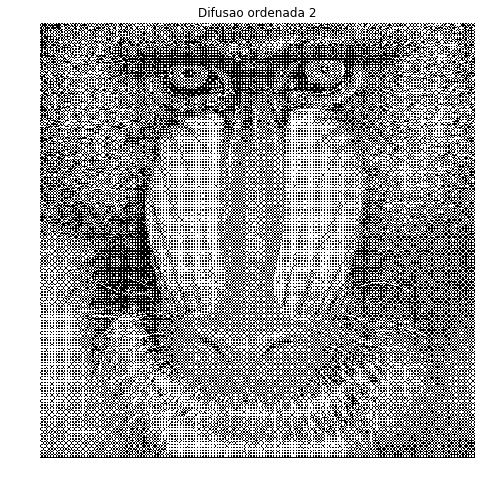

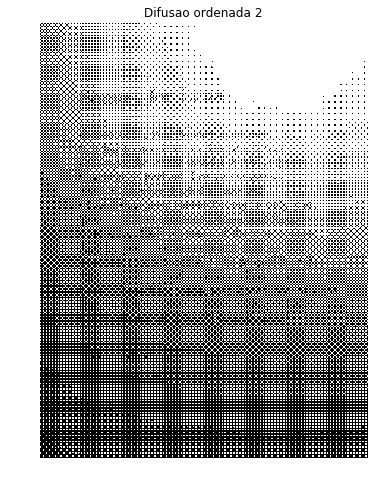

True

In [6]:
m2 = np.array([
    [0,12,3,15],
    [8,4,11,7],
    [2,14,1,13],
    [10,6,9,5]
])

# Normalize image to [0-16]
image_2 = apply_ordered_difusion(m2, img)
plt.imshow(image_2, cmap=plt.cm.gray)
plt.title("Difusao ordenada 2"), plt.axis('off')
plt.show()

# Normalize image to [0-16]
image_2_soneto = apply_ordered_difusion(m2, img2)
plt.imshow(image_2_soneto, cmap=plt.cm.gray)
plt.title("Difusao ordenada 2"), plt.axis('off')
plt.show()

save_image(image_2, 'results/image_2.pbm')

save_image(image_2_soneto, 'results/image_2_soneto.pbm')

# Check if the image contains only 0 and 1
len(image_2[image_2 == 1]) + len(image_2[image_2 == 0]) == image_2.size and \
len(image_2_soneto[image_2_soneto == 1]) + len(image_2_soneto[image_2_soneto == 0]) == image_2_soneto.size

In [7]:
def apply_error(i, j, img, value):
    ''' Check if the parameters are inbound '''
    dimensions = img.shape
    if i >= 0 and i < dimensions[0] and \
       j >= 0 and j < dimensions[1]:
        img[i][j] += value
        
def error_difusion(img, order, always_right = True):
    ''' 
    Make the error difusion, given an image and a specified order
    always_right check to change the error difusion (from zig zag order) 
    '''
    new_image = img.copy()
    right = True
    last = (-1,-1)
    
    for pos in order:
        oldpixel = new_image[pos]
        newpixel = np.where(oldpixel > 128, 255, 0)
        new_image[pos] = newpixel
        quant_error = oldpixel - newpixel
        
        # Small fix to difuse error correctly if it is going from left to right
        if right or always_right:
            apply_error(pos[0], pos[1] + 1, new_image, 7/16 * quant_error)
            apply_error(pos[0] + 1, pos[1] - 1, new_image, 3/16 * quant_error)
            apply_error(pos[0] + 1, pos[1], new_image, 5/16 * quant_error)
            apply_error(pos[0] + 1, pos[1] + 1, new_image, 1/16 * quant_error)
        # or vice versa
        else:
            apply_error(pos[0], pos[1] - 1, new_image, 7/16 * quant_error)
            apply_error(pos[0] + 1, pos[1] + 1, new_image, 3/16 * quant_error)
            apply_error(pos[0] + 1, pos[1], new_image, 5/16 * quant_error)
            apply_error(pos[0] + 1, pos[1] - 1, new_image, 1/16 * quant_error)
        
        # Check the next error difusion direction (left->right, right->left)
        if not always_right:
            if pos[1] - last[1] < 0 or (last[1] == pos[1] and last[1] != 0):
                right = False
            else:
                right = True
            last = pos
    return new_image

In [8]:
def left_right_order(image):
    ''' Make roder to difuse error from left to right '''
    order = []
    dimension = image.shape
    for i in range(dimension[0]):
        for j in range(dimension[1]):
            order.append((i,j))
    return order

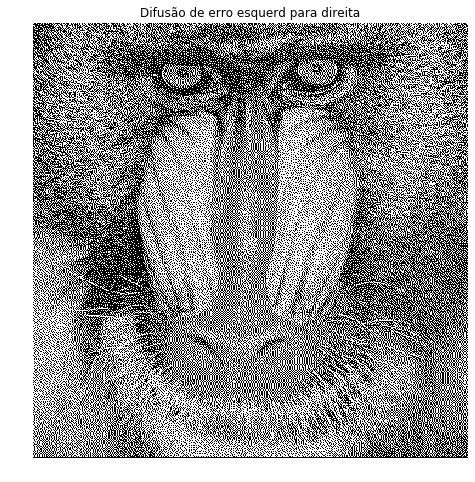

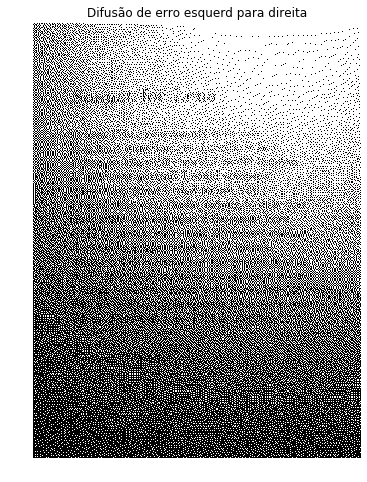

In [9]:
image_3 = error_difusion(img, left_right_order(img))
plt.imshow(image_3, cmap=plt.cm.gray)
plt.title("Difusão de erro esquerd para direita"), plt.axis('off')
plt.show()

image_3_soneto = error_difusion(img2, left_right_order(img2))
plt.imshow(image_3_soneto, cmap=plt.cm.gray)
plt.title("Difusão de erro esquerd para direita"), plt.axis('off')
plt.show()

save_image(image_3, 'results/image_3.pbm')

save_image(image_3_soneto, 'results/image_3_soneto.pbm')

In [10]:
# Check if the image contains only 0 and 255
len(image_3[image_3 == 255]) + len(image_3[image_3 == 0]) == image_3.size

True

In [11]:
def zig_zag_order(image):
    ''' Make a zig-zag order to difuse error starting from left to right'''
    order = []
    i = j = 0
    right = True
    dimension = image.shape
    count = image.size
    
    while(count > 0):
        order.append((i,j))
        if right:
            j += 1
            if j >= dimension[1]:
                right = False
                j = dimension[1] - 1
                i += 1
        else:
            j -= 1
            if j < 0:
                right = True
                j = 0
                i += 1
        count -= 1
    return order

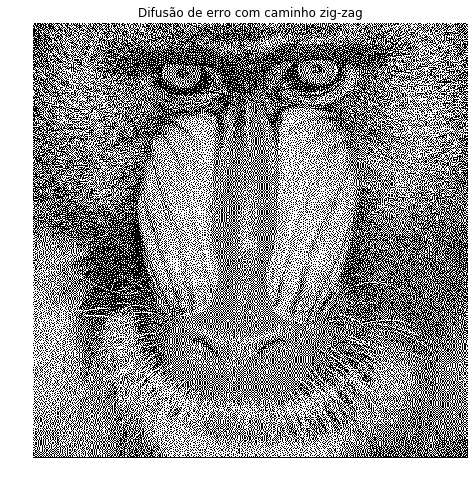

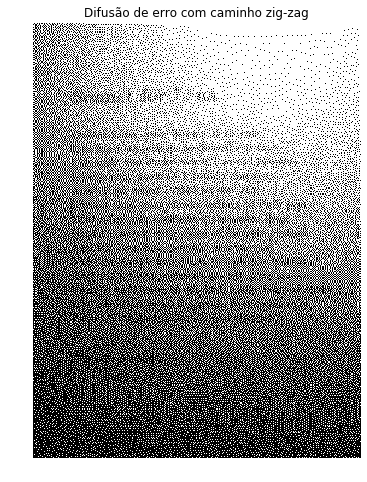

In [12]:
image_4 = error_difusion(img, zig_zag_order(img), False)
plt.imshow(image_4, cmap=plt.cm.gray)
plt.title("Difusão de erro com caminho zig-zag"), plt.axis('off')
plt.show()

image_4_soneto = error_difusion(img2, zig_zag_order(img2), False)
plt.imshow(image_4_soneto, cmap=plt.cm.gray)
plt.title("Difusão de erro com caminho zig-zag"), plt.axis('off')
plt.show()

save_image(image_4, 'results/image_4.pbm')

save_image(image_4_soneto, 'results/image_4_soneto.pbm')

In [13]:
# Check if the image contains only 0 and 255
len(image_4[image_4 == 255]) + len(image_4[image_4 == 0]) == image_4.size

True